In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## **One Hot Encoding the Target Classes**

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/finalproject/dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/finalproject/dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [ ]:
result = np.array(result)
print(result.shape)
result = result.reshape(2891,2)
print(result.shape)

(2891, 1, 2)
(2891, 2)


## **Splitting the Data into Training & Testing**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)



```
# This is formatted as code
```

# Model Building

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [ ]:
y_train.shape

(2312, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
58/58 [==============================] - 41s 145ms/step - loss: 5.3760 - accuracy: 0.7413 - val_loss: 0.5879 - val_accuracy: 0.8290
Epoch 2/30
58/58 [==============================] - 7s 121ms/step - loss: 0.3656 - accuracy: 0.8789 - val_loss: 0.2517 - val_accuracy: 0.9033
Epoch 3/30
58/58 [==============================] - 7s 124ms/step - loss: 0.2163 - accuracy: 0.9152 - val_loss: 0.2281 - val_accuracy: 0.9154
Epoch 4/30
58/58 [==============================] - 7s 123ms/step - loss: 0.1584 - accuracy: 0.9516 - val_loss: 0.2174 - val_accuracy: 0.9396
Epoch 5/30
58/58 [==============================] - 7s 122ms/step - loss: 0.1215 - accuracy: 0.9602 - val_loss: 0.2216 - val_accuracy: 0.9499
Epoch 6/30
58/58 [==============================] - 7s 122ms/step - loss: 0.0805 - accuracy: 0.9719 - val_loss: 0.1557 - val_accuracy: 0.9551
Epoch 7/30
58/58 [==============================] - 7s 124ms/step - loss: 0.0828 - accuracy: 0.9732 - val_loss: 0.1604 - val_accuracy: 0.9499
Epoch

In [ ]:
print(history)

In [ ]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 1s 41ms/step - loss: 0.1542 - accuracy: 0.9758


[0.1542099416255951, 0.9758203625679016]

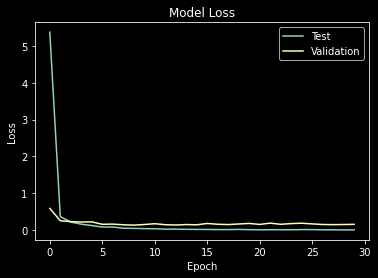

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

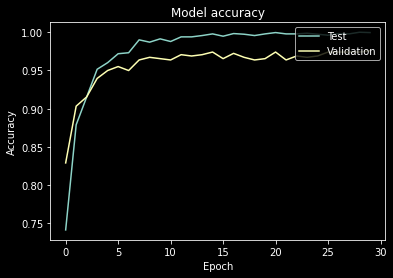

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

[[7.430885e-24 1.000000e+00]]
100.0% Confidence No, Its not a tumor


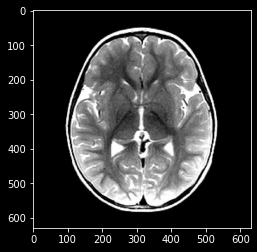

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/finalproject/dataset/no/no0.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
print(res)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
a=str(res[0][classification]*100) + '% Confidence ' + names(classification)
print(a)

99.61826205253601% Confidence Its a Tumor


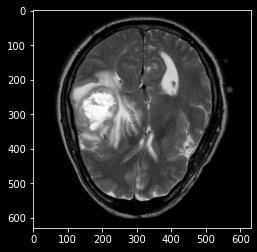

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/finalproject/dataset/yes/y100.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

In [ ]:
model.save("/content/drive/MyDrive/finalproject/finalprojectoldcode.h5")